In [1]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon, shapiro
from sklearn.model_selection import GridSearchCV
import gc
import itertools
from sklearn.utils import resample
import ast
import json
import re
import statsmodels.api as sm

import utils 
import model_train
from constants import *
import particle_swarm
from scipy.stats import ttest_rel, shapiro, wilcoxon

%load_ext autoreload
%autoreload 2

# Merge files

MO-OBAM

In [2]:
MO_OBAM_base_path = '/Users/yusiwei/Library/CloudStorage/OneDrive-Personal/research/Fourth Year Paper/Experiments/MO-OBAM experiments/German credit/ML results'

In [3]:
# List all .csv files in the folder
csv_files = [
    os.path.join(MO_OBAM_base_path, f)
    for f in os.listdir(MO_OBAM_base_path)
    if f.endswith('.csv') and os.path.isfile(os.path.join(MO_OBAM_base_path, f))
]

# Read and concatenate all CSVs
MO_OBAM_results = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Optional: check the result
print(f"Loaded {len(csv_files)} CSV files. Combined shape: {MO_OBAM_results.shape}")

Loaded 1 CSV files. Combined shape: (9, 24)


In [4]:
MO_OBAM_results

,k,model,n_clusters_set,n_cluster,avg_accuracy,avg_precision,avg_recall,avg_f1_score,avg_auc,avg_loss,...,max_accuracy,max_precision,max_recall,max_f1_score,max_auc,max_loss,max_tp,max_tn,max_fp,max_fn
0,20,DT,10,10.0,0.678795,0.774260,0.764445,0.768560,0.622134,11.577402,...,0.7635,0.855388,0.862810,0.837353,0.714624,14.327352,125.3,41.2,44.9,47.3
1,20,DT,15,14.7,0.679835,0.772682,0.769088,0.770145,0.620890,11.539916,...,0.7565,0.853729,0.852103,0.831370,0.712704,14.345374,123.5,40.5,45.1,47.5
2,20,DT,20,19.7,0.678570,0.772004,0.766308,0.768361,0.621680,11.585512,...,0.7560,0.866867,0.857843,0.827622,0.719194,14.471527,121.8,41.3,44.5,46.9
3,20,DT,25,24.4,0.678595,0.772866,0.766398,0.768764,0.621111,11.584610,...,0.7580,0.861043,0.861695,0.833079,0.710270,14.615701,123.4,40.4,45.5,47.7
4,20,DT,30,29.0,0.680070,0.775674,0.765701,0.769828,0.622933,11.531446,...,0.7595,0.852478,0.859501,0.832716,0.709151,14.525592,122.7,39.6,46.3,48.0
5,20,DT,35,33.1,0.679415,0.774625,0.765976,0.769553,0.621492,11.555055,...,0.7585,0.857937,0.856998,0.833679,0.715925,14.471527,123.6,40.0,44.4,46.6
6,20,DT,40,37.4,0.677260,0.771233,0.766426,0.768020,0.618708,11.632729,...,0.7545,0.855150,0.857208,0.828859,0.717969,14.471527,123.4,41.1,46.7,46.8
7,20,DT,45,42.2,0.679440,0.773951,0.766068,0.769200,0.622464,11.554154,...,0.7485,0.852357,0.859595,0.826181,0.703800,14.399440,122.3,41.1,44.4,47.2
8,20,DT,50,46.5,0.677955,0.772449,0.766226,0.768583,0.619448,11.607678,...,0.7515,0.848311,0.851097,0.828223,0.704493,14.255265,123.0,40.5,44.8,47.9


Closed-Loop Framework

In [7]:
closed_loop_base_path = '/Users/yusiwei/Library/CloudStorage/OneDrive-Personal/research/Fourth Year Paper/Experiments/2nd experiments/Experiment results/V2/V2_1_G_Mean/Results'

In [8]:
# List all .csv files in the folder
csv_files = [
    os.path.join(closed_loop_base_path, f)
    for f in os.listdir(closed_loop_base_path)
    if f.endswith('.csv') and os.path.isfile(os.path.join(closed_loop_base_path, f))
]

# Read and concatenate all CSVs
closed_loop_results = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Optional: check the result
print(f"Loaded {len(csv_files)} CSV files. Combined shape: {closed_loop_results.shape}")

Loaded 1 CSV files. Combined shape: (9, 5)


In [11]:
closed_loop_results

,k,model,n_clusters_set,global_best,n_cluster
0,20,DT,10,10.916722,9.8
1,20,DT,15,10.939789,14.9
2,20,DT,20,10.944295,19.8
3,20,DT,25,10.902664,24.3
4,20,DT,30,10.882660,28.5
5,20,DT,35,10.888427,33.9
6,20,DT,40,10.863016,37.8
7,20,DT,45,10.838507,41.9
8,20,DT,50,10.774349,46.7


<h1>Comparison Checking -- Maximum Loss<h1>

In [ ]:
# German credit
baseline_max_loss_dict = {
    'DT': 14.0570,
    'LR': 0.5762,
    'NB': 2.2771,
    'NN': 3.4248,
    'RF': 0.6991,
    'SVM': 0.6920
}

# # Adult
# baseline_max_loss_dict_adult = {
#     'DT': 6.9935,
#     'LR': 0.5381,
#     'NB': 1.1092,
#     'NN': 27.2596,
#     'RF': 0.4328,
#     'SVM': 0.7057
# }

# # Sepsis
# baseline_max_loss_dict_sepsis = {
#     'DT': 5.5211,
#     'LR': 0.2302,
#     'NB': 3.7346,
#     'NN': 0.2853,
#     'RF': 0.2842,
#     'SVM': 0.2977
# }

<h1>Comparison Checking -- Average Loss<h1>

In [9]:
# German credit dataset
baseline_avg_loss_dict = {
    'DT': 11.2059,
    'LR': 0.4975,
    'NB': 1.3150,
    'NN': 7.1022,
    'RF': 0.4919,
    'SVM': 0.6318
}

# # Adult dataset
# baseline_avg_loss_dict = {
#     'DT': 6.7000,
#     'LR': 0.5139,
#     'NB': 1.0142,
#     'NN': 8.9624,
#     'RF': 0.3835,
#     'SVM': 0.6938
# }

# # Sepsis dataset
# baseline_avg_loss_dict = {
#     'DT': 5.0402,
#     'LR': 0.2183,
#     'NB': 3.1888,
#     'NN': 0.2537,
#     'RF': 0.2376,
#     'SVM': 0.2832
# }

Plotting comparison for model: DT


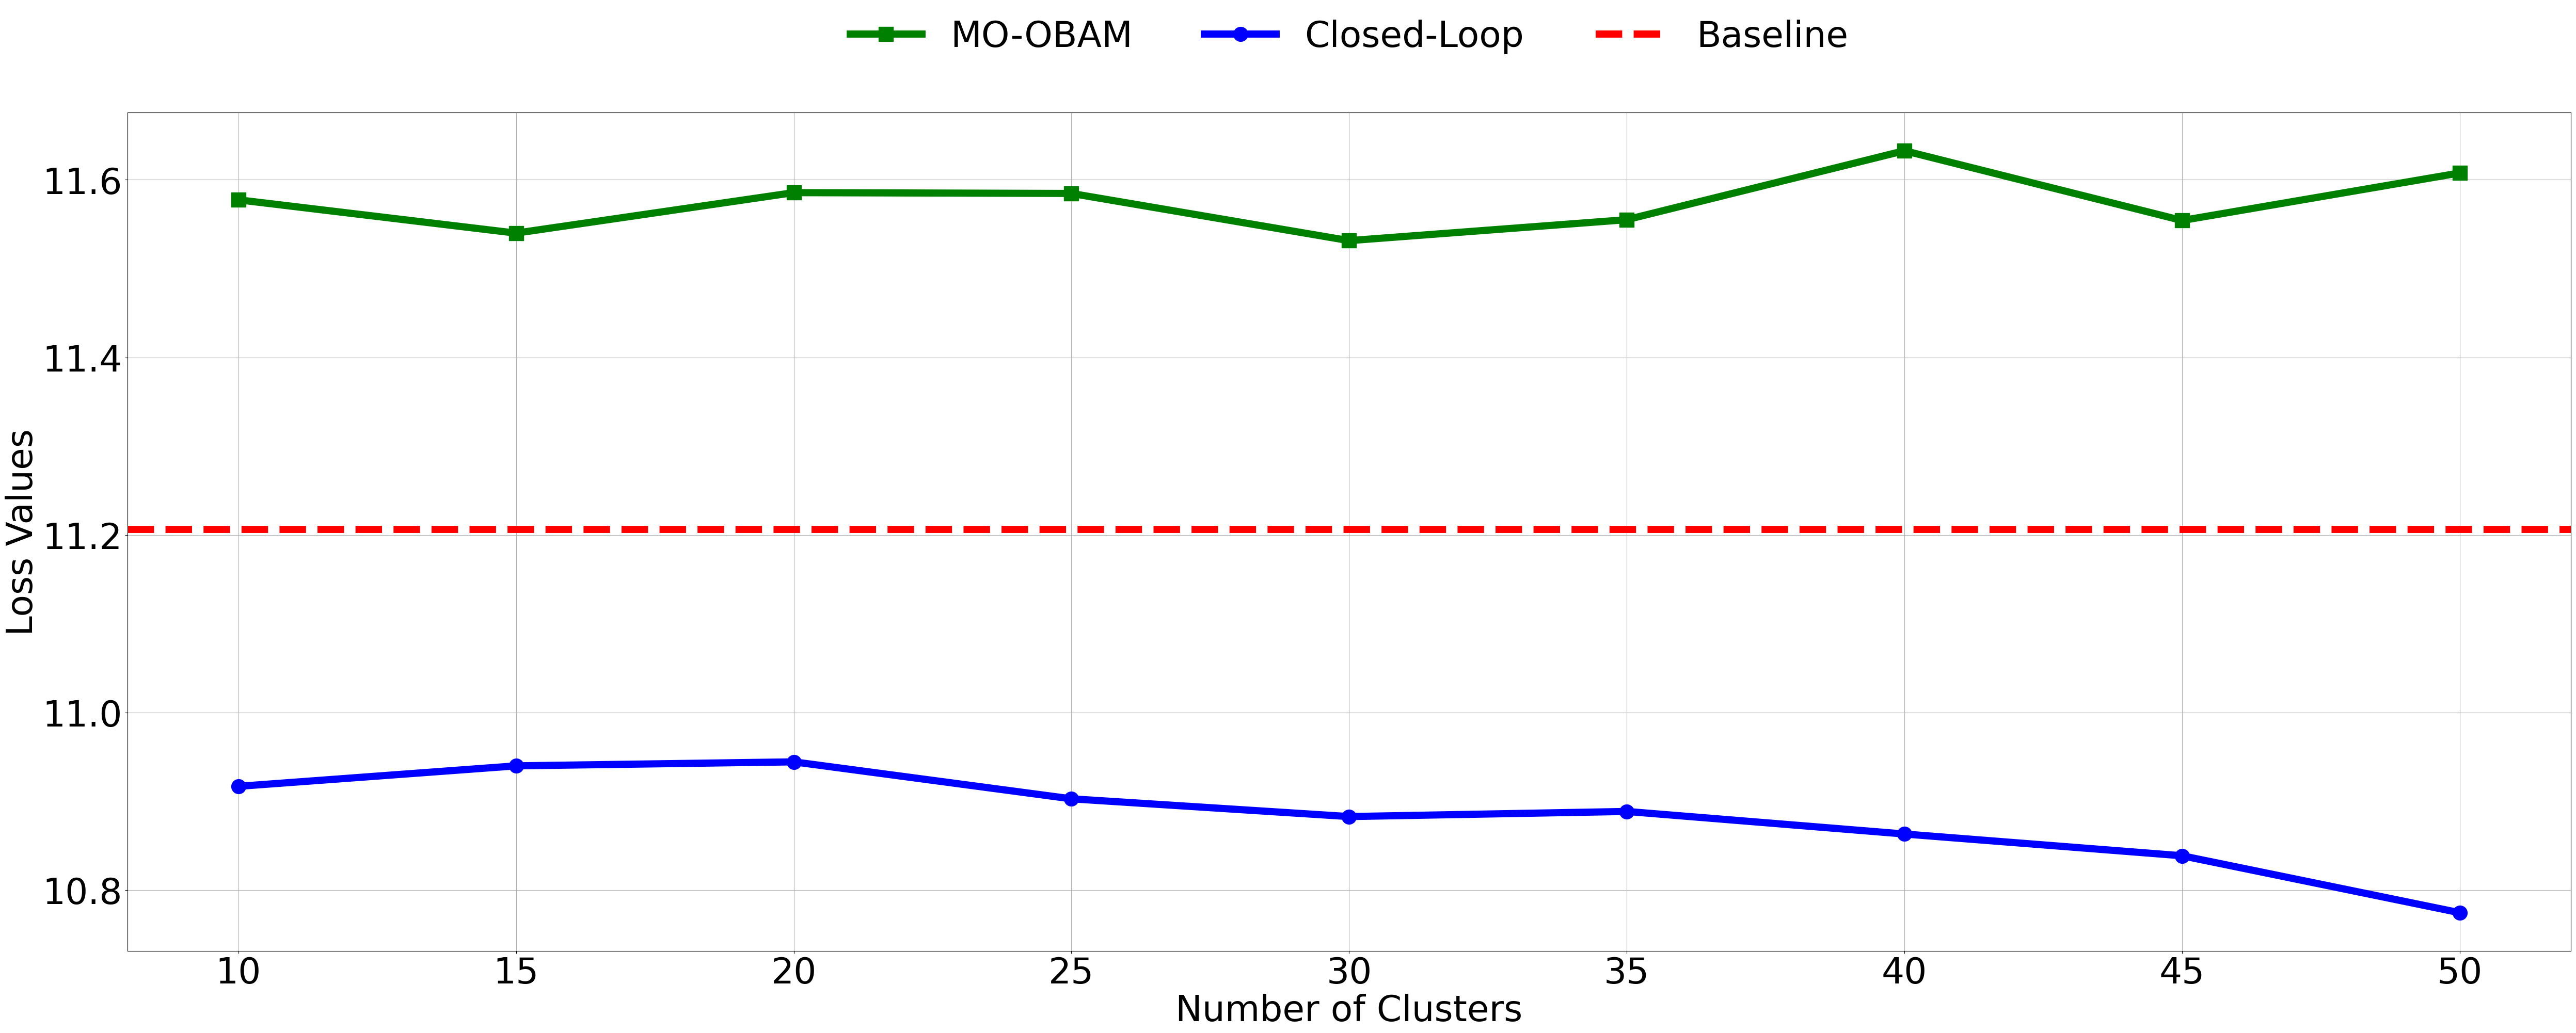

In [13]:
for model in MO_OBAM_results['model'].unique():
    plot_comparison_by_model(
        model=model,
        MO_OBAM_results=MO_OBAM_results,
        column_to_use='avg_loss',
        closed_loop_results=closed_loop_results,
        baseline_dict=baseline_avg_loss_dict,
        output_path=None,
        show_plot=True
    )